In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("D:\my files\Scraped Data\customers.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [2]:
df.shape

(440, 8)

In [3]:
df.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.drop(columns=["Channel","Region"],inplace=True)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [6]:
from sklearn.preprocessing import normalize
data = normalize(df)
data

array([[0.70833271, 0.53987376, 0.42274083, 0.01196489, 0.14950522,
        0.07480852],
       [0.44219826, 0.61470384, 0.59953989, 0.11040858, 0.20634248,
        0.11128583],
       [0.39655169, 0.5497918 , 0.47963217, 0.15011913, 0.2194673 ,
        0.48961931],
       ...,
       [0.36446153, 0.38846468, 0.7585445 , 0.01096068, 0.37223685,
        0.04682745],
       [0.93773743, 0.1805304 , 0.20340427, 0.09459392, 0.01531   ,
        0.19365326],
       [0.67229603, 0.40960124, 0.60547651, 0.01567967, 0.11506466,
        0.01254374]])

In [7]:
col_names = ["Fresh","Milk","Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
data = pd.DataFrame(data,columns=col_names)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294


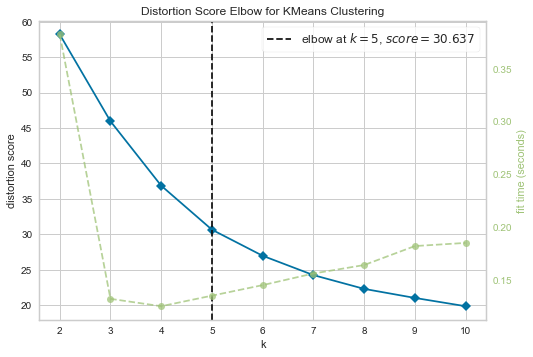

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
elbow = KElbowVisualizer(KMeans(),k=10)
elbow.fit(data)
elbow.show()

In [9]:
kmeans = KMeans(n_clusters=5,init="random")
y_means = kmeans.fit_predict(data)
y_means

array([1, 2, 2, 0, 0, 1, 1, 1, 1, 4, 4, 0, 1, 1, 1, 0, 4, 2, 1, 1, 0, 3,
       0, 2, 1, 1, 0, 0, 4, 0, 1, 2, 0, 0, 2, 4, 0, 1, 4, 0, 0, 0, 1, 4,
       1, 2, 4, 2, 1, 4, 3, 4, 0, 4, 0, 1, 4, 4, 0, 1, 1, 4, 1, 4, 3, 4,
       4, 1, 2, 0, 3, 1, 3, 0, 1, 0, 3, 4, 0, 2, 0, 4, 1, 0, 1, 4, 2, 0,
       3, 0, 0, 3, 4, 3, 2, 4, 4, 3, 3, 3, 1, 4, 4, 0, 0, 0, 4, 4, 2, 4,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 1, 2, 0, 3, 0,
       0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0, 3, 0, 1, 0, 0, 3, 0, 0, 2, 0, 2,
       0, 4, 4, 0, 4, 4, 4, 0, 0, 4, 4, 1, 4, 1, 0, 0, 4, 2, 4, 4, 4, 4,
       0, 1, 1, 2, 1, 0, 4, 2, 4, 0, 3, 4, 4, 4, 0, 0, 0, 4, 0, 0, 3, 4,
       1, 0, 4, 4, 1, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 0, 4, 3,
       0, 4, 3, 3, 0, 0, 1, 3, 1, 3, 3, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 1, 4, 4, 0, 0, 0, 3, 1, 4, 3, 1, 2, 0, 1, 3, 0, 0, 0, 3, 0, 4,
       4, 2, 4, 0, 4, 0, 3, 2, 2, 0, 2, 2, 0, 3, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 3, 4, 0, 1, 0, 1, 4, 4, 1,

In [12]:
data["clusters"]=y_means
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,clusters
0,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809,1
1,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286,2
2,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619,2
3,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494,0
4,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294,0


In [14]:
x = data["Fresh"]
y = data["Milk"]
z = data["Grocery"]

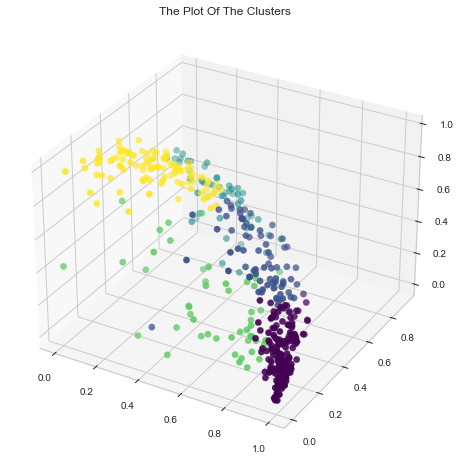

In [17]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=data["clusters"], marker='o', cmap = "viridis" )
ax.set_title("The Plot Of The Clusters")
plt.show()

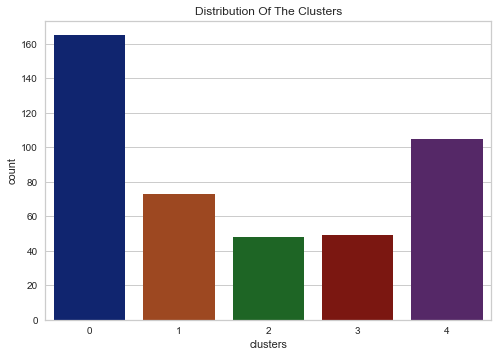

In [21]:
sns.set_palette("dark")
pl = sns.countplot(x=data["clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

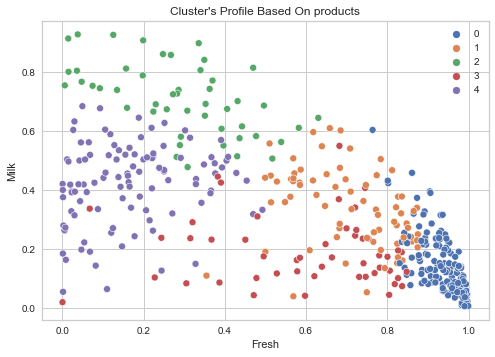

In [25]:

pl = sns.scatterplot(data = data,x=data["Fresh"], y=data["Milk"],hue=data["clusters"],palette="deep")
pl.set_title("Cluster's Profile Based On products")
plt.legend()
plt.show()

In [27]:
# the model seperate the clusters 
# we have to save the clusters into our desired format
cluster_0 = data[y_means == 0]
cluster_0.to_excel("cluster1.xlsx")

In [28]:
cluster_1 = data[y_means == 1]
cluster_1.to_excel("cluster2.xlsx")

In [29]:
cluster_2 = data[y_means == 2]
cluster_2.to_excel("cluster3.xlsx")

In [30]:
cluster_3 = data[y_means == 3]
cluster_3.to_excel("cluster3.xlsx")

In [33]:
cluster_4 = data[y_means == 4]
cluster_4.to_excel("cluster4.xlsx")